(markov-chains)=
# Markov Chain

Reference:
- Introduction to Probability Models [notes](https://galton.uchicago.edu/~yibi/teaching/stat317/2014/Lectures/)
- Transience and Recurrence [link](https://brilliant.org/wiki/transience-and-recurrence/)

## Definitions

### Basics

#### Stochastic Processes

A **stochastic process** $\boldsymbol{X} = \left\{ X_t: t\in T \right\}$ is a collection of random variables indexed by $t$.
- We call $X_t$ the **state** of the process at time $t$. The set of values of the random variables is called the **state space** $\mathcal{X}$.
- If $T$ is countable infinite, then we call $\boldsymbol{X}$ a **discrete** time process.

If $X_t = i, i \in \mathcal{X}$, we say the process is in state $i$ at time $t$.

#### Markov Chain

Let state space $\mathcal{X}$ be a finite or countable set. For simplicity, we assume the discrete state space is given by the set of nonnegative integers $\left\{ 0,1,\ldots \right\}$.

A discrete time process $\boldsymbol{X} = \left\{ X_0, X_1, \ldots \right\}$ taking values in $\mathcal{X}$ is called a **Markov chain** if, for any positive integer $t$ and any states $i_0, \ldots, i_{t-1}, i, j$,

$$
\mathbb{P}\left(X_{t+1}=j \mid X_{t}=i, X_{t-1}=i_{t-1}, \ldots, X_{0}=i_{0}\right) =\mathbb{P}\left(X_{t+1}=j \mid X_{t}=i\right) \\
$$

Verbally, we say that, given the past history of the process up through time $t$, the distribution of the process at time $t+1$ depends only on the state at time $t$.


#### Transition Matrix

A Markov chain is called **homogeneous** or **stationary** if $\mathbb{P}\left(X_{t+1}=j \mid X_{t}=i\right)=p_{i j}$ for all $t$. This indicates that this conditional distribution does not very with $t$. In the following discussion we only consider stationary Markov chains.

The values $p_{ij}$ are called **transition probabilities**, which can be stored in a transition matrix $\boldsymbol{P}$. We can show by induction that the **$n$-step transition probability** is $p_{ij}^{(n)} = [\boldsymbol{P}^n] _{ij}$, which is the probability that, starting in state $i$, the Markov chain is found in state $j$ after $n$ transitions. In matrix form $\boldsymbol{P} ^{(n)} = \boldsymbol{P}^n$.

Chapman-Kolmogorov Equation
: The $(m+n)$-step transition probability from state $i$ to $j$, satisfies

  $$
  p_{ij}^{(m + n)} = \sum_{k \in \mathcal{X}} p_{ik}^{(m)}p_{kj}^{(n)}
  $$

  In matrix form, $\boldsymbol{P}^{(m+n)} = \boldsymbol{P}^{(m)} \cdot \boldsymbol{P}^{(n)}$

#### Graphical Representation

A Markov chain with state space $V$ and transition matrix $\boldsymbol{P}$ can be represented by a labeled directed graph, where edges are given by transitions with nonzero probability $E = \left\{ (u,v) \mid p_{u,v} >0 \right\}$. Note that self-loops are allowed for $p_{ii} > 0$.

:::{figure} mc-graph
<img src="../imgs/mc-graph.png" width = "70%" alt=""/>

Graphical representation of a Markov chain
:::

### Irreducibility

Consider a Markov chain $\left\{ X_t, t \ge 0 \right\}$ with state space $\mathcal{X}$.

Definitions
: - A state $j$ is **accessible** from state $i$ if there exists some $n \ge 0$ such that $p_{ij}^{(n)} > 0$ for some $t$. In the graph-representation of the chain, we have $i \leftrightarrow j$ iff there are directed paths from $i$ to $j$.

    - Accessibility is transitive: if $i \rightarrow j, j \rightarrow k$ then $i \rightarrow k$.

  - Two states $i$ and $j$ **communicate** if they are accessible from each other, written as $i \leftrightarrow j$. In the graph-representation of the chain, we have $i \leftrightarrow j$ if there are directed paths from $i$ to $j$ and from $j$ to $i$.
    - Communicability are
      - reflective: $i \leftrightarrow j$, since $\boldsymbol{P}_{ii} ^0 = \mathbb{P} \left(X_{0}=i \mid X_{0}=i\right)=1>0$ by convention
      - symmetric: $i \leftrightarrow j \Leftrightarrow j \leftrightarrow i$
      - transitive: if $i \leftrightarrow j$ and $j \leftrightarrow k$ then $i \leftrightarrow k$.

    - Thus communicability defines a partition of states.

      $$
      \mathcal{X} = \mathcal{X} _1 \cup \mathcal{X} _2 \cdots \text{ and } \mathcal{X} _i \text{ are disjoint}  
      $$

      Each $\mathcal{X} _i$ is called a **communication class**. All states in that class communicate.

  - A Markov chain is **irreducible** if any state is accessible from any other in some finite number of transitions, i.e.

    $$\forall i, j, \exists n: \quad p_{ij}^{(n)} > 0$$

    Equivalently,
    - all states belong to one communication class, or
    - its graph representation is a strongly connected graph.

### Recurrence and Transience

#### Definition

For a state $i \in \mathcal{X}$, define

$$
f_{i}=\mathbb{P}\left(X_{n}=i \text { for some } n>0 \mid X_{0}=i\right)
$$

- If $f_i = 1$, we say state $i$ is **recurrent**
- If $f_i < 1$, we say state $i$ is **transient**

#### Number of Revisits

Let $N_i$ be the number of times the process revisits state $i$ after starting from $i$, then we can show

$$
\mathbb{E}[N_i]=\sum_{n=1}^{\infty} p_{i i}^{(n)}
$$

We can use this expectation to characterize recurrent and transient states.


$$
\text { State } i \text { is }\left\{\begin{array}{ll}
\text { recurrent if } & \sum_{n=1}^{\infty} P_{i i}^{(n)}=\infty \\
\text { transient if } & \sum_{n=1}^{\infty} P_{i i}^{(n)}<\infty
\end{array}\right.
$$

Note that the chain may be infinite.

#### Properties

Equivalent conditions of recurrent:
- state $i$ is recurrent
- the process revisits $i$ w.p. $f_i = 1$, i.e. will always come back
- starting from state $i$, the process will revisit state $i$ infinitely often: $\mathbb{E} [N_i] = \infty$
- $\sum_{n=1}^{\infty} p_{i i}^{(n)} = \infty$

For transient states,
- the process revisits $i$ w.p. $f_i < 1$, may not come back!
- starting from state $i$, the number of times the process revisits state $i$ is finite, with geometric distribution

  $$
  \mathrm{P}\left(N_{i}=k\right)=f_{i}^{k}\left(1-f_{i}\right),\quad k = 1, 2, \ldots,
  $$

  That is, the process comes back $k$ times and restart and then never comes back. Every start is a Bernoulli experiment with success probability $1- f_i$.

- $\mathbb{E} [N_i] = \frac{1}{1-f_i}$
- $\sum_{n=1}^{\infty} p_{i i}^{(n)} < \infty$

Propositions

- States in a finite-state Markov chain CANNOT be all transient.
- If $i \leftrightarrow j$, and $i$ is recurrent, then $j$ is also recurrent.
- All states of a finite irreducible Markov chain are recurrent.

#### Random Walks

In a one-dimensional random walk,

$$
X_{n+1}=\left\{\begin{array}{ll}
X_{n}+1 & \text { with prob. } p \\
X_{n}-1 & \text { with prob. } 1-p
\end{array}\right.
$$

- State space is $\mathbb{Z}$
- All states communicate, there is one class, Hence, states are all transient or all recurrent. It suffices to check whether $0$ is recurrent or transient.


$$
\begin{aligned}
P_{00}^{(2 n+1)}&=0 \\
P_{00}^{(2 n)}&= \binom{2n}{n}  p^{n}(1-p)^{n}\quad \text { by Stirlin's formula }\\
&=\frac{(2 n) !}{n ! n !} p^{n}(1-p)^{n} \quad n ! \approx n^{n+0.5} e^{-n} \sqrt{2 \pi} \\
&\approx \frac{(2 n)^{2 n+0.5} e^{-2 n} \sqrt{2 \pi}}{\left(n^{n+0.5} e^{-n} \sqrt{2 \pi}\right)^{2}} p^{n}(1-p)^{n} \\
&=\frac{1}{\sqrt{\pi n}}[4 p(1-p)]^{n}
\end{aligned}
$$

Thus,

$$
\sum_{n=1}^{\infty} P_{i i}^{2 n}=\sum_{n=1}^{\infty} \frac{1}{\sqrt{\pi n}}[4 p(1-p)]^{n}\left\{\begin{array}{ll}
<\infty & \text { if } p \neq 1 / 2 \\
=\infty & \text { if } p=1 / 2
\end{array}\right.
$$

One-dimensional random walk is recurrent if $p=1/2$, and transient otherwise.

In general, it can be shown that for a $d$-dimensional **symmetric** random walk

$$
\sum_{n=1}^{\infty} P_{00}^{(2 n)}\left\{\begin{array}{ll}
=\infty & \text { for } d=1 \text { or } 2 \\
<\infty & \text { for } d \geq 3
\end{array}\right.
$$

"A drunken man will find his way home. A drunken bird might be lost forever."


### Periodicity

Definition (Period)
: The period $d(i)$ of a state $i$ of a homogeneous Markov chain is defined as

  $$
  d(i) = \mathrm{gcd} \left\{ t: p_{ii} ^{(n)} >0 \right\}
  $$

  where $\mathrm{gcd}$ stands for greatest common divisor. In other words, $p_{ii}^t = 0$ whenever $t$ is not a multiple of $d(i)$.

Definition (Periodic and aperiodic)
: - If $d(i)>1$, we say that state $i$ is periodic. That is, there is a period $d(i)$ such that starting in state $i$, the chain can return to $i$ only at multiples of the period $d(i)$, and $d(i)$ is the largest such integer.
  - If $d(i)=1$, we say that state $i$ is aperiodic.
  - A Markov chain is aperiodic if all its states are aperiodic.

Properties
: - If $p_{ii} > 0$ then $x$ is aperiodic. Converse is not true.
  - If $i \leftrightarrow j$, then $d(i) = d(j)$.
  - Periodicity is a class property. That is, all states in the same class have the same period.
  - If a finite Markov chain is aperiodic, then there exists a positive integer $m$, such that for all states $i$, it is guaranteed to return to that state in a finite number of transitions, i.e.

    $$\exists m, \forall i: \quad p_{ii}^{(n)} > 0 \quad \text{ for some } n \ge m$$

  - If a Markov chain is irreducible and aperiodic, then there exists an integer $m$, such that any state is accessible from any other after at least $m$ transitions, i.e.

    $$
    \exists m, \forall i: \quad p_{ij}^{(n)} > 0 \quad \text{ for some } n \ge m
    $$

    ***Proof***

    $$
    \underbrace{\mathbb{P} \left[X_{m}=j \mid X_{0}=i\right]}_{p_{i, j}^{(m)}} \geqslant \underbrace{\mathbb{P} \left[X_{m}=j \mid X_{m-n_{i, j}}=i\right]}_{\text{irreducible: } p_{i, j}^{(n_{i, j})}>0} \cdot \underbrace{\mathbb{P} \left[X_{m-n_{i, j}}=i \mid X_{0}=i\right]}_{\text{aperiodic: } p_{i, i}^{(m-n_{i, j})}>0} .
    $$

    $\square$

## Distributions

### Stationary Distribution

Definition
: A row vector $\boldsymbol{\pi} ^{\top}$ is called a **stationary distribution** for a Markov chain with transition matrix $\boldsymbol{P}$ if
  - $\pi_j \ge 0$ and $\sum_j\pi_j = 1$
  - $\boldsymbol{\pi} ^{\top} \boldsymbol{P} = \boldsymbol{\pi}^{\top}$

Existence?
: Not all Markov chains have a stationary distribution. 1-dimensional symmetric random walk does not have a stationary distribution.

Uniqueness?
: Stationary distribution may not be unique. For instance,
  - when $\boldsymbol{P} = \boldsymbol{I}$, then every probability distribution on the states is a stationary probability distribution.
  - when the process has two communication classes such that $\boldsymbol{P}$ is a block diagonal matrix, then let $\boldsymbol{\pi} _1$ and $\boldsymbol{\pi} _2$ be the respective stationary distributions of the two sub-Markov chains, then $\boldsymbol{\pi} = [c \boldsymbol{\pi} _1, (1-c) \boldsymbol{\pi} _2]$ is a stationary distribution of the whole train, for any $0<c<1$.

  In the next section we show sufficient conditions for uniqueness.

### Limiting Distribution

Definition
: A Markov chain is said to have a limiting distribution if the limit of transition probability exits

  $$
  \lim _{n \rightarrow \infty} p_{ij}^{(n)} = \pi _j
  $$

  for each state $j$ with $\pi_j \ge 0$ and $\sum_j\pi_j = 1$, which is independent of starting state $i$. Equivalently,

  $$
  \lim _{n \rightarrow \infty} \boldsymbol{P}^n  = \boldsymbol{1} \boldsymbol{\pi} ^{\top}
  $$

It is easy to verify that a limiting distribution is a stationary distribution.


Existence
: Not all Markov chains have a stationary distribution.

Uniqueness
: If a Markov Chain has a limiting distribution, then it is unique.

### Fundamental Limit Theorems


For a Markov chain, consider the first return time to a recurrent state $i$

$$
T_{i}=\min \left\{n>0: X_{n}=i \mid X_{0}=i\right\}
$$

We say a state is
- **positive recurrent** if $\mathbb{E} [T_i] < \infty$
- **null recurrent** if $\mathbb{P} (T_i < \infty) =1$ but $\mathbb{E} [T_i] = \infty$
- transient if $\mathbb{P} (T_i < \infty) < 1$. Note that the event $\left\{ T_i < \infty \right\}$ is equivalent to $\left\{ X_{n}=i \text { for some } n>0 \right\}$.
- **ergodic** if it is aperiodic and positive recurrent.

Properties
- Positive/null recurrence is also a class property.
- If a state $i$ is null recurrent then $\lim _{n \rightarrow \infty} P_{j i}^{(n)}=0$ for all $j \in \mathcal{X}$
- In a finite-state Markov chain all recurrent states are positive recurrent.


Theorem 1
: For a recurrent irreducible aperiodic Markov chain,

  $$\lim _{n \rightarrow \infty} p_{i j}^{(n)}=\frac{1}{\mathbb{E}\left[T_{j}\right]}$$

  In other words, a recurrent state $j$ is null recurrent iff $\lim _{n \rightarrow \infty} p_{i j}^{(n)}=0$.

  If the Markov chain is, in addition, positive recurrent (hence irreducible and ergodic), then

  $$
  \pi_{i}=\lim _{n \rightarrow \infty} p_{i j}^{(n)}=\frac{1}{\mathbb{E}\left[T_{i}\right]}
  $$

  where $\boldsymbol{\pi}$ is the **unique** stationary distribution of the chain.

Theorem 2
: If a Markov chain is irreducible, then there will be a unique stationary distribution $\boldsymbol{\pi}$ if and only if the Markov chain is positive recurrent, which can be found by the limit

  $$
  \pi_{j}=\left\{\begin{array}{ll}
  \lim _{n \rightarrow \infty} \frac{1}{n} \sum_{k=1}^{n} p_{i j}^{(k)} & \text { if the chain is periodic } \\
  \lim _{n \rightarrow \infty} p_{i j}^{(n)} & \text { if the chain is aperiodic }
  \end{array}\right.
  $$


## Exercise

### Infect 1000

*There are 1,000 people in one room. One of them carries a disease which infects 100% if one shares hands with an infected person. In each minute all the people in the room are randomly paired to share hands with each other. What is your estimate of the expected number of people infected after 10 minutes? Can you use only pen and paper to solve this?*


#### Sol.1 Markov Chain

Let $I_t$ be the number of infected individuals after $t$ minutes. Define a transition matrix $\boldsymbol{P}=\left\{ p_{i,j} \right\}$, where

$$p_{i,j} = \operatorname{\mathbb{P}}(I_{t+1}=j\vert I_t=i)$$

It's easy to see that

- $p_{1,2}=1$
- $p_{2,2}=\frac{1}{999}, p_{2,4}=\frac{998}{999}$

In general, we have, for $l=0,1,\ldots, \min(k, \frac{n}{2}-k)$,

$$p_{2k, 2(t+l)}= \frac{C_{2k}^{2l} C_{n-2k}^{2l} P_{2l}^{2l} R_{2k-2l} R_{n-2k-2l}}{R_{n}}$$

where
- $C_{2k}^{2l}$ is the number of ways to select $2l$ infected individuals from the total $2k$ infected individuals, to be paired with $2l$ healthy individuals
- $C_{n-2k}^{2l}$ is the number of ways to select $2l$ healthy individuals from the total $n-2k$ healthy individuals, to be paired with $2l$ infected individuals
- $P_{2l}^{2l}$ is the number of ways to pair $2l$ infected individuals and $2l$ healthy individuals, such that additional $2l$ individuals are infected
- $R_m$ is the number of ways to arrange a even number $m$ of individuals into $\frac{m}{2}$ pairs. It's easy to find

$$R_m=\frac{C_m^2C_{m-2}^2\ldots C_2^2 }{\frac{m}{2}!} = \frac{m!}{(2!)^{\frac{m}{2}}(\frac{m}{2}!)}$$

- $R_{2k-2l}$ is the number of ways to arrange $2k-2l$ infected individuals into pairs, who do not share hands with healthy individuals
- $R_{n-2k-2l}$ is the number of ways to arrange $n-2k-2l$ healthy individuals into pairs, who do not share hands with infected individuals and keep being healthy
- $R_n$ is the total number of ways to arrange $n$ people into $n/2$ pairs in the room

Simplification gives

$$p_{2k, 2(k+l)} =\frac{C_{n/2}^{k+l}C_{k+l}^{2l}4^l}{C_n^{2k}}$$

Then the distribution of $I_{10}$ is

$$\boldsymbol{p}_{I_{10}}^\top=\boldsymbol{e}_1^\top \boldsymbol{P}^{10}$$

where $\boldsymbol{e}_1 = [1,0,\ldots,0]$ and $\boldsymbol{p}_{I_{10}} = [p_{1,1}^{(10)}, \ldots, p_{1,n}^{(10)}]$

The expected number is

$$\operatorname{\mathbb{E}}(I_{10}) = [1,2,3,\ldots, n]^\top\boldsymbol{p}_{I_{10}} $$

By simulation, we get the result

In [1]:
import numpy as np
import scipy.sparse as sparse
from scipy.special import comb, perm, factorial

n = 1000
t = 10
ks = list(range(1, 500+1))
rows = [0, 1]
cols = [0, 2]
ps = [0, 1]
for k in ks:
    for l in range(0, int(min(k, n/2-k))+1):
        rows.append(2 * k)
        cols.append(2 * (k+l))
        ps.append(comb(n/2, k+l) * comb(k+l, 2*l) * 4**l / comb(n, 2*k))

P = sparse.coo_matrix((ps, (rows,cols)), shape=(n+1, n+1))
Pt = P**t
distribution = Pt[1, :]
Et = sum([i * distribution.toarray()[0, i] for i in range(1, n+1)])
print(Et)

642.3471200227277


#### Sol.2 Conditional Expectation

Let $p_{t,j}$ be the probability that infected individual $j$ is paired with a **healthy** individual from time $t$ to $t+1$, we have

$$p_{t,j} = \frac{n-I_t} {n - 1} =: p_t$$

Let $I_{t+1, j}$ be the number of individuals infected by infected individual $j$ from time $t$ to $t+1$, we have

$$
I_{t+1,j}=\begin{cases}
1 & p_{t}\\
0 & 1-p_{t}
\end{cases}
$$

Hence,

$$
\begin{align}
\operatorname{\mathbb{E}}\left( I_{t+1, j} \right) &= p_{t} \times 1 + (1-p_{t}) \times 0  \\
& = p_{t} \\
\end{align}
$$

Therefore, the conditional expectation of the total number of infected individuals is given by

$$
\begin{align}
\operatorname{\mathbb{E}}(I_{t+1}|I_t) & = \operatorname{\mathbb{E}}\left( I_t +  \sum_{j=1}^{I_t} I_{t+1,j} \right)\\
&= I_t + \sum_{j=1}^{I_t} \operatorname{\mathbb{E}}\left( I_{t+1, j} \right) \\
& = I_t + I_t \times p_t \\
& = I_t + I_t \times \frac{n-I_t}{n - 1} \\
\end{align}
$$

How to solve it?

By the law of total expectation,

$$
\begin{align}
\operatorname{\mathbb{E}}(I_{t+1}) & = \operatorname{\mathbb{E}}\left( \operatorname{\mathbb{E}}(I_{t+1}|I_t) \right) \\
& = \operatorname{\mathbb{E}}\left(I_t + I_t \times \frac{n-I_t}{n - 1} \right)\\
& = \frac{2n-1}{n-1}\operatorname{\mathbb{E}}\left( I_t \right) - \frac{1}{n-1}\operatorname{\mathbb{E}}\left( I_t^2 \right)
\end{align}
$$

In particular, since $\operatorname{\mathbb{P}}(I_1=2\vert I_0=1)=1$, there is no randomness in $I_1$, such that

$$
\begin{align}
\operatorname{\mathbb{E}}(I_2) &= \operatorname{\mathbb{E}}\left( \operatorname{\mathbb{E}}(I_2\vert I_1) \right) \\
&= \operatorname{\mathbb{E}}\left(I_1 + I_1 \times \frac{n-I_1}{n - 1}\right)\\
& = 2 + 2 \times 998 / 999 \\
& = 3994/999
\end{align}
$$

But when $t\ge 3$, the computation become complicated due to the second-order term $\operatorname{\mathbb{E}}\left( I_t^2 \right)$

One attempt is to approximate $\operatorname{\mathbb{E}}\left( I_t^2 \right)$ by $\left[ \operatorname{\mathbb{E}}\left( I_t \right) \right]^2$ such that we have a **recurrence relation**

$$\operatorname{\mathbb{E}}\left( I_{t+1} \right) \approx \frac{2n-1}{n-1}\operatorname{\mathbb{E}}\left( I_t \right) - \frac{1}{n-1}\left[ \operatorname{\mathbb{E}}\left( I_t \right) \right]^2$$

Note that this will lead to a larger result since $\operatorname{\mathbb{E}}\left( I_t^2 \right) - \left[ \operatorname{\mathbb{E}}\left( I_t \right) \right]^2 = \mathrm{Var}\left( I_t \right) \ge 0$. But since $\mathrm{Var}\left( I_t \right)$ is small, the positive error is also small.


By simulation, we get the result

In [2]:
def f(n, t, I0=1):
    Is = [I0] # initial number of infected
    for _ in range(1, t+1):
        Is.append(Is[-1] + Is[-1] * (n - Is[-1]) / (n - 1))

    return Is[-1]

n = 1000
t = 10
print(f(n, t))

642.9754330548355


The result $642.975$ is slightly larger than the result $642.347$ in Solution 1.

If we take a closer look at the recurrence relation, dividing $2n-1$ on both sides gives

$$\frac{\operatorname{\mathbb{E}}\left( I_{t+1} \right)}{2n-1} \approx \frac{2n-1}{n-1} \frac{\operatorname{\mathbb{E}}\left( I_t \right)}{2n-1} - \frac{2n-1}{n-1}\left[ \frac{\operatorname{\mathbb{E}}\left( I_t \right)}{2n-1} \right]^2$$

Let $x_t = \frac{\operatorname{\mathbb{E}}\left( I_t \right)}{2n-1}$ then it becomes

$$x_{t+1} \approx 2x_t(1-x_t)$$

when $n$ is large.

Given $x_0$, if the equality holds, we can solve for $x_t$ by

$$x_{t} = \frac{1}{2}\left\{1-\exp \left[2^{t} \ln \left(1-2 x_{0}\right)\right]\right\}$$

For details, see [Logistic Map](https://mathworld.wolfram.com/LogisticMap.html).

#### Sol.3 Simulation

To verify the solutions above, we can simulate the infection process.

In [3]:
import numpy as np

class Population():
    def __init__(self, n):
        self.size = n
        self.infected = np.array([0]) # indexes of infected individuals

    def count_infected(self):
        return len(self.infected)

    def infect(self, t=1, return_records=False):
        """
        simulate infection for t minutes
        """
        It_records = []
        for _ in range(t):
            perm = np.random.permutation(self.size)
            perm_pairs = perm.reshape(n//2, 2) # random pairs
            status = np.isin(perm, self.infected, assume_unique=True)
            status_pairs = status.reshape(self.size//2, 2)
            new_pairs = np.logical_xor(status_pairs[:,0], status_pairs[:,1])
            new_boolean = ~status_pairs[new_pairs]
            new_individuals = perm_pairs[new_pairs][new_boolean].flatten()
            self.infected = np.hstack((self.infected, new_individuals))
            It_records.append(self.count_infected())

        if return_records:
            return np.array(It_records)



np.random.seed(0)
n = 1000
t = 10
pop = Population(n)
pop.infect(t)
print(pop.count_infected())

658


To get the expected number $\mathbb{E}(I_{10}), we can try to simulate $m$ times and take the average.

In [4]:
np.random.seed(0)
m = 10000
t = 10
Its = np.empty((m,t))
for i in range(m):
    pop = Population(n)
    Its[i] = pop.infect(t, return_records=True)
print(Its[:, 9].mean())

642.2862


We see the simulation result $642.286$ is quite close to the result $\mathbb{E}(I_{10}) = 642.347$ in Solution 1.

The plot below shows $m$ trajectories of $I_t$ in the simulation. We can see all lines are close to each other, which verifies that the variance is quite small.

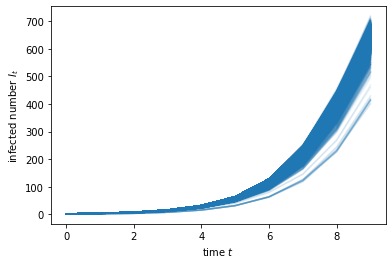

In [5]:
import matplotlib.pyplot as plt
for row in range(m):
    plt.plot(Its[row], c='C0', alpha=0.1)
plt.ylabel(r'infected number $I_t$')    
plt.xlabel(r'time $t$')    
plt.show()